In [236]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

In [237]:
diabetes_dt = pd.read_csv("diabetes.csv")
diabetes_dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [238]:
diabetes_dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [239]:
diabetes_dt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [240]:
diabetes_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [241]:
diabetes_dt.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

<Axes: xlabel='Outcome'>

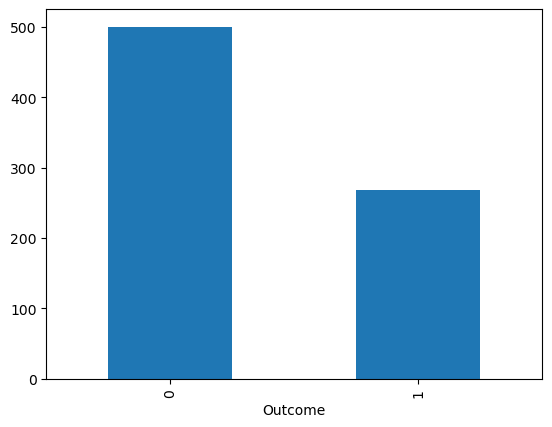

In [242]:
count=diabetes_dt["Outcome"].value_counts()
count.plot(kind="bar")
#count=y.value_counts()
#count

In [243]:
#plt.bar(count.index, count.values)
#plt.xlabel("Count Have the diabetes")
#plt.ylabel("Patients ")
#plt.
#plt.show()

In [244]:
have_above_40=diabetes_dt[ (diabetes_dt["Age"]>40) & (diabetes_dt["Outcome"]== 1) ]
have_above_40

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [245]:
X=diabetes_dt.drop("Outcome", axis=1)
y=diabetes_dt["Outcome"]
X.shape, y.shape

((768, 8), (768,))

In [246]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [247]:
from sklearn.linear_model import LogisticRegression
lg_R=LogisticRegression(solver='lbfgs', max_iter=500)
lg_R.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [248]:
from sklearn.metrics import accuracy_score
pred=lg_R.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy is ",acc)

Accuracy is  0.7359307359307359


In [249]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_S=scaler.fit_transform(X_train)
x_test_S=scaler.transform(x_test)

In [250]:
lg_R.fit(X_train_S,y_train)
S_pred=lg_R.predict(x_test_S)
ac= accuracy_score(S_pred,y_test)
print("ACC of scaled data is ",ac)

ACC of scaled data is  0.7359307359307359


In [251]:
simple1=X.iloc[8]
simple2=X.iloc[33]
print(lg_R.predict([simple1]))
print(lg_R.predict([simple2]))

[1]
[1]


In [258]:
#Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
Pred_T=DTC.predict(x_test)
Acc_T=accuracy_score(Pred_T,y_test)
Accuracy_all["Decision Tree"]=Acc_T

In [259]:
#Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
KNC=KNeighborsClassifier()
KNC.fit(X_train,y_train)
Pred_K=KNC.predict(x_test)
Acc_K=accuracy_score(Pred_K,y_test)
Accuracy_all["KNeighbors"]=Acc_K

In [260]:
# Using SVC
from sklearn.svm import SVC
S_V_C=SVC()
S_V_C.fit(X_train,y_train)
Pred_S=S_V_C.predict(x_test)
Acc_S=accuracy_score(Pred_S, y_test)
Accuracy_all["SVM"]=Acc_S

In [261]:
# Using LogisticRegression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train, y_train)
Pred_L=LR.predict(x_test)
Acc_L=accuracy_score(Pred_L, y_test)
Accuracy_all["LR"]=Acc_L

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


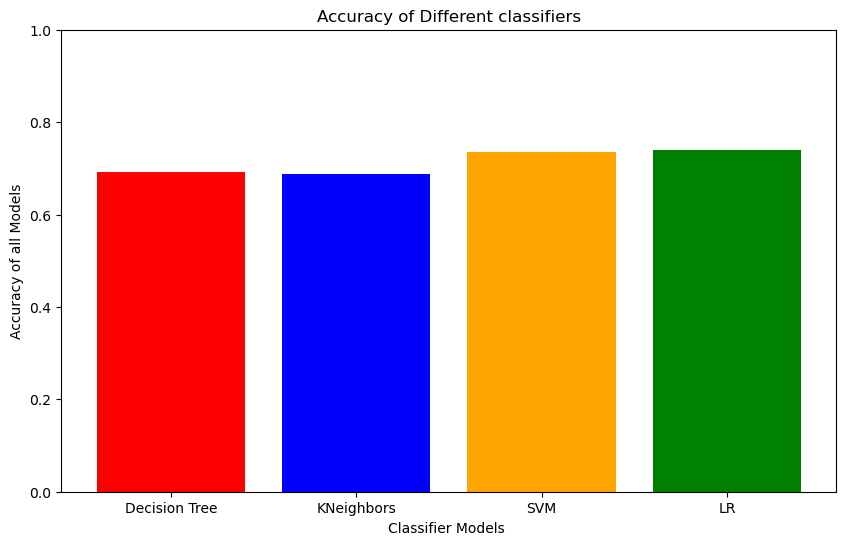

In [262]:
plt.figure(figsize=(10,6))
plt.bar(Accuracy_all.keys(), Accuracy_all.values(),  color=['red','blue', 'orange', 'green'])
plt.xlabel("Classifier Models ")
plt.ylabel("Accuracy of all Models")
plt.ylim(0,1)
plt.title("Accuracy of Different classifiers")
plt.show()

In [263]:
#Tak 02 



In [264]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [265]:
samples=pd.DataFrame(iris.data, columns=iris.feature_names)
samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [266]:
sample,New_sample=train_test_split(samples, test_size=0.3, random_state=42)

In [267]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [268]:
from sklearn.cluster import KMeans
K_mean=KMeans(n_clusters=3 )
K_mean.fit(sample)

KMeans(n_clusters=3)

In [269]:
#Quality measure
print(K_mean.inertia_)

56.5149574780059


In [270]:
Labels=K_mean.predict(sample)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [271]:
labels=K_mean.predict(New_sample)
print(labels)
print(K_mean.inertia_)

[2 0 1 2 2 0 2 1 2 2 1 0 0 0 0 2 1 2 2 1 0 2 0 1 1 1 1 1 0 0 0 0 2 0 0 2 2
 0 0 0 2 2 2 0 0]
56.5149574780059


In [272]:
inertia=[]
def elbow(C):
    for c in C:
        K_mean=KMeans(n_clusters=c)
        K_mean.fit(samples)
        inertia.append(K_mean.inertia_)
    return inertia

In [273]:
c= range(2,6,1)

In [274]:
test=elbow(c)

Text(0.5, 1.0, 'Elbow curve for test')

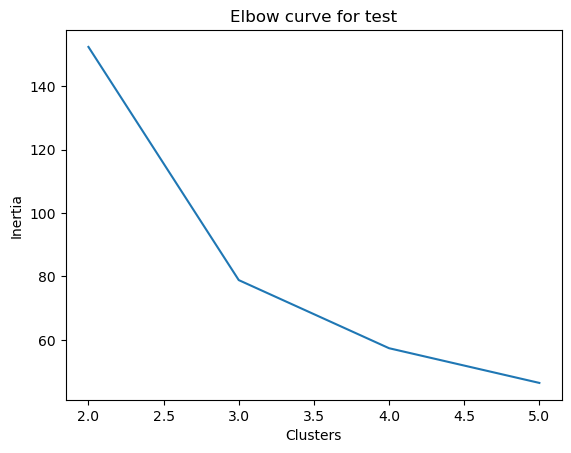

In [275]:
plt.plot(c,test)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for test')

In [276]:
K_mean=KMeans(n_clusters=3)
K_mean.fit(samples)
labels=K_mean.predict(samples)

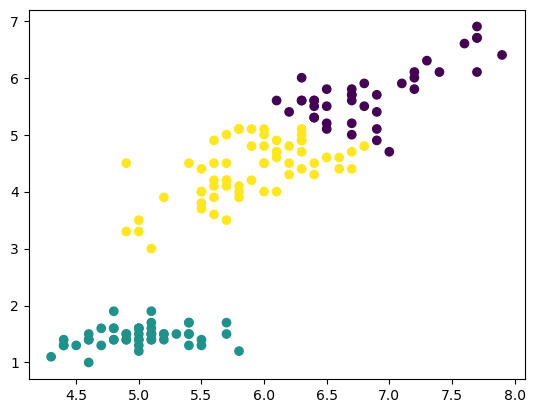

In [277]:
Xs = samples.iloc[:, 0]
ys = samples.iloc[:, 2]
plt.scatter(Xs,ys, c=labels)
plt.show()

In [278]:
X=iris.data
y=iris.target
X.shape,y.shape

((150, 4), (150,))

In [279]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [280]:
Accuracy_all={}

In [281]:
#Using DecisionTreeClassifier

DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
Pred_T=DTC.predict(X_test)
Acc_T=accuracy_score(Pred_T,y_test)
Accuracy_all["Decision Tree"]=Acc_T

In [282]:
#Using KNeighborsClassifier

KNC=KNeighborsClassifier()
KNC.fit(X_train,y_train)
Pred_K=KNC.predict(X_test)
Acc_K=accuracy_score(Pred_K,y_test)
Accuracy_all["KNeighbors"]=Acc_K

In [283]:
# Using SVC

S_V_C=SVC()
S_V_C.fit(X_train,y_train)
Pred_S=S_V_C.predict(X_test)
Acc_S=accuracy_score(Pred_S, y_test)
Accuracy_all["SVM"]=Acc_S

In [284]:
# Using LogisticRegression

LR=LogisticRegression()
LR.fit(X_train,y_train)
Pred_L=LR.predict(X_test)
Acc_L=accuracy_score(Pred_L, y_test)
Accuracy_all["LR"]=Acc_L

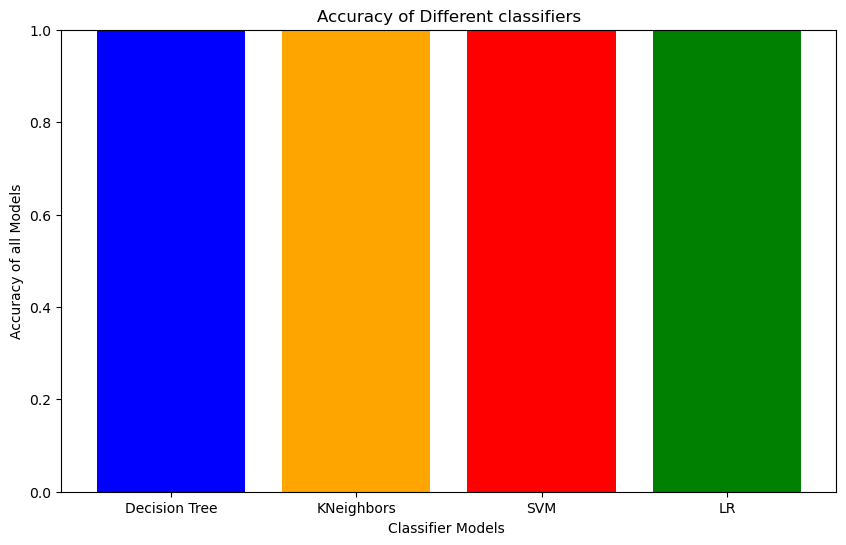

In [285]:
plt.figure(figsize=(10,6))
plt.bar(Accuracy_all.keys(), Accuracy_all.values(),  color=['blue', 'orange', 'red', 'green'])
plt.xlabel("Classifier Models ")
plt.ylabel("Accuracy of all Models")
plt.ylim(0,1)
plt.title("Accuracy of Different classifiers")
plt.show()


In [286]:
# Practice Task
Kmeans=KMeans(n_clusters=3,random_state=0).fit(X)

In [287]:
labels=Kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

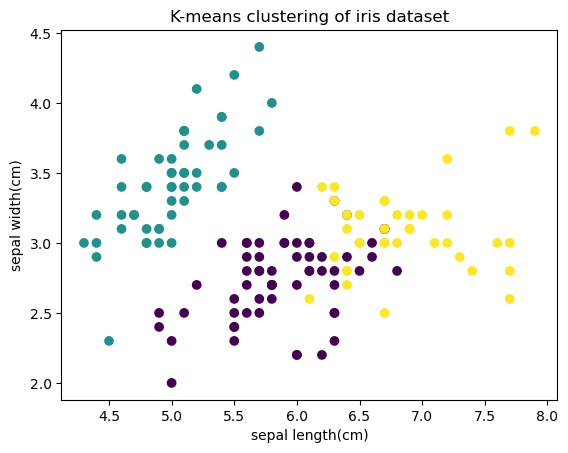

In [288]:
plt.scatter(X[:,0],X[:,1,],c=labels)
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width(cm)")
plt.title("K-means clustering of iris dataset")
plt.show()